# Genomics

The goal of this lecture is to highligh a variety of genomics tools and methods that are commonly used in python.

Things we will go over in this module are:

1) Using Biopython for searching in NCBI databases

2) Using Scanpy for conducting scRNAseq analysis


## Installs/Imports

In [ ]:
!mkdir data
!wget -O data/species_classification_ranks_processed.txt https://raw.githubusercontent.com/bharris12/URP_2021_Programming_Course/main/lecture_6/data/species_classification_ranks_processed.txt

In [ ]:
!pip -q install biopython
!pip -q install scanpy

In [1]:
import numpy as np
import pandas as pd

### GenBank comprises several subdivisions:

**Nucleotide**: a collection of nucleic acid sequences from several sources.

**Genome Survey Sequence** (GSS): uncharacterized short genomic sequences.

**Expressed Sequence Tags** (EST): uncharacterized short cDNA sequences.

Searching the Nucleotide database with general text queries will produce the most relevant results. You can also use a simple query based on protein name, gene name or gene symbol.

To limit your search to only certain kinds of records, you can search using GenBank's Limits page or alternatively use the Filter your results field to select categories of records after a search.

If you cannot find what you are searching for, check how the database interpreted your query by investigating the Search details field on the right side of the page. This field automatically translates your search into standard keywords.

Here is a link to all the potential search [fields used in Genbank](https://www.ncbi.nlm.nih.gov/books/NBK49540/)

In [36]:
#Bio comes from installing the biopython python module
from Bio import Entrez

#Using this fake email actually works
Entrez.email = "tmpemail@your_mail_server.com"

handle = Entrez.esearch(db="nucleotide", term='"Zea mays"[Orgn] AND rbcL[Gene] ')
record = Entrez.read(handle)
record["Count"]

'18'

You can see this exact search via this [URL](https://www.ncbi.nlm.nih.gov/nuccore/?term="Zea+mays"%5BOrgn%5D+AND+rbcL%5BGene%5D)

## F-strings

One thing you might notice is that we are writing our query as a string, and it might be nice to easily change the string so we can make many queries.

To do this we can use F strings

Here's an example below

In [7]:
species_list=['Zea mays','Arabidopsis thaliana']
for species in species_list:
    # Notice how I have an f before the open quotes
    # This tells python to evaluate this as an f string
    # You can pass any variable there and it will place it in the string
    query_string = f' "{species}"[Orgn] AND rbcL[Gene]'
    print(query_string)

 "Zea mays"[Orgn] AND rbcL[Gene]
 "Arabidopsis thaliana"[Orgn] AND rbcL[Gene]


In [11]:
for i in range(5):
    # You do not have to cast the variable to a string either
    print(f'This is loop iteration {i}')

This is loop iteration 0
This is loop iteration 1
This is loop iteration 2
This is loop iteration 3
This is loop iteration 4


In [12]:
rand_number = np.random.rand()
for i in range(5):
    # You can include a colon and specify the format of the output
    # In this case I am specifying the number of digits to round to
    print(f'This random number rounded {rand_number : .{i}f}')

This random number rounded  0
This random number rounded  0.2
This random number rounded  0.20
This random number rounded  0.203
This random number rounded  0.2026


In [13]:
# But if you place a comma after the colon
# It will place commas every 3 digits
f'${10000000:,}'


'$10,000,000'

In [15]:
# It will even convert fractions to percentages
# Here I specify that it should be a percentage is 2 decimal places

f'{2/3 :.5%}'

'66.66667%'

## Excersise

1) Read in the file `species_classification_ranks_processed.txt` as `species_info`

In [46]:
species_info = pd.read_csv('data/species_classification_ranks_processed.txt',index_col='Species')

2) For each species count the number entries for the genes per1 and per2 and store the results as new columns in the dataframe `species_info`

In [47]:
for gene in ['per1','per2','per3']:
    results = []
    print(gene)
    for species in species_info.index:
        query_string = f'"{species}"[Orgn] AND {gene}[Gene] '
        handle = Entrez.esearch(db="nucleotide", term=query_string)
        record = Entrez.read(handle)
        results.append(int(record["Count"]))
    species_info[f'{gene}_counts'] = results

per1
per2


In [ ]:
genelist = ['per1','per2','per3']
for gene in genelist:
    results = []
    print(gene)
    for species in species_info.index:
        query_string = f'"{species}"[Orgn] AND {gene}[Gene] '
        handle = Entrez.esearch(db="nucleotide", term=query_string)
        record = Entrez.read(handle)
        results.append(int(record["Count"]))
    species_info[f'{gene}_counts'] = results

In [ ]:
def search_entrez_genes(genes, species_df):
    """
    Pass a list of genes to search and a dataframe that has species as the index
    
    """
    for gene in genes:
        results = []
        print(gene)
        for species in species_df.index:
            query_string = f'"{species}"[Orgn] AND {gene}[Gene] '
            handle = Entrez.esearch(db="nucleotide", term=query_string)
            record = Entrez.read(handle)
            results.append(int(record["Count"]))
        species_df[f'{gene}_counts'] = results

3) Now make multiple plots that compare these genes and color them by different levels of species classification

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='per1_counts', ylabel='per2_counts'>

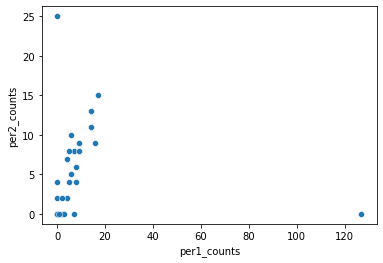

In [59]:
sns.scatterplot(data=species_info,x='per1_counts',y='per2_counts')

## Scanpy tutorial

A lot of bioinformatic analysis rely on specially designed packages that include both specific objects/classes for storing the data and functions for analyzing it. 

A class has a state which is stored as **attributes**

A class also has **methods** that are behaviors/functions that can be called to modify or evaluate the state of an instance

In [67]:
class URP():
        
        number_of_urps = 0
        
        def __init__(self, name, lab, mentor, school, institute='CSHL'):
            self.name = name 
            self.lab = lab
            self.mentor = mentor
            self.school = school
            self.institute = institute
            
            URP.number_of_urps+=1
            
        def describe_urp(self):
            print(f"""
{self.name} is an URP in the {self.lab} 
they are mentored by {self.mentor} 
and is an undergrad at {self.school}""")

In [61]:
URP.number_of_urps

0

You create an instance of the URP class by calling the init function like below.

Self is basically a dummy variable so you can ignore that above

In [68]:
noah = URP(name='Noah',lab='Gillis',mentor='Ben',school='JHU')
ben = URP('Ben','Atwal','Mickey','Colgate', institute='Cold Spring Harbor Laboratory')

In [69]:
URP.number_of_urps

2

In [70]:
## Here we are calling the method `descibe_urp` on the instance of Noah
noah.describe_urp()


Noah is an URP in the Gillis 
they are mentored by Ben 
and is an undergrad at JHU


In [79]:
def who_is_this(urp):
    print(f"""
    {urp.name} is an URP in the {urp.lab} 
    they are mentored by {urp.mentor} 
    and is an undergrad at {urp.school}""")

In [80]:
## You can also pass instances of classes to functions
## Just like you would pass to any other variable
who_is_this(ben)


    Ben is an URP in the Atwal 
    they are mentored by Mickey 
    and is an undergrad at Colgate


In [ ]:
##Classes can also have variables
URP.number_of_urps

For scRNAseq analysis in Python we use the Anndata object to store all of our data

<img src='https://falexwolf.de/img/scanpy/anndata.svg' width='500px'>

You can see that this object has attributes `.X` `.obs` and `.var` (there are other less important ones not listed)

While the Anndata object has some methods, we generally use it by passing it as the first variable to functions in the scanpy library

You can see the documentation for [scanpy](https://scanpy.readthedocs.io/en/stable/). In general the ability to read documentation is a critical skill for bioinformatics. 


The first thing to notice with scanpy is that it is separated into sublibraries

* `sc.pp` : Preprocessing
* `sc.tl` : Tools 
* `sc.pl` : Plotting
* `sc.datasets` : datasets
* `sc.external` : external

An easy way to learn about the library is to go through the tutorials. So for the remaining time you can go through the scanpy tutorial at this url [https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)

## Scanpy PBMC 3K

In [81]:
import scanpy as sc

In [84]:
adata = sc.datasets.pbmc3k()

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

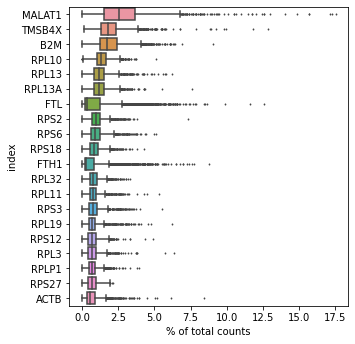

In [91]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [93]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


In [94]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

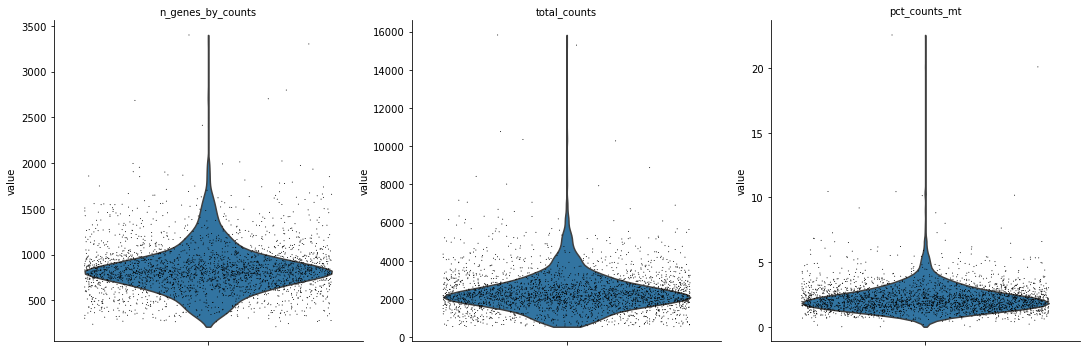

In [95]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

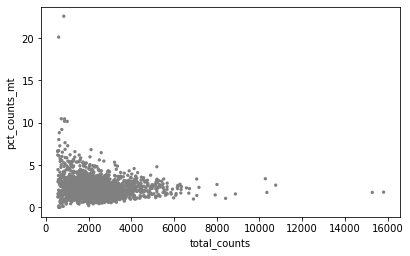

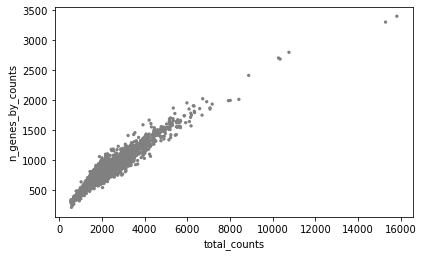

In [96]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [97]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [98]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/bharris/miniconda3/envs/feyn/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [99]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [101]:
sc.pp.log1p(adata)

In [102]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

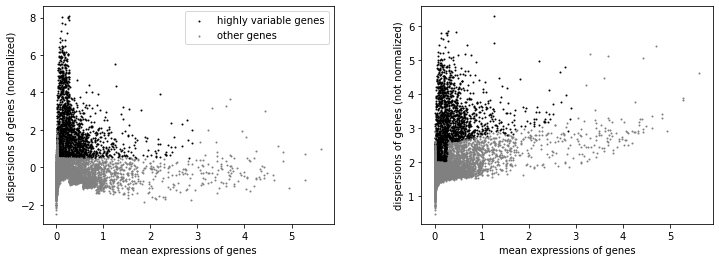

In [103]:
sc.pl.highly_variable_genes(adata)

In [104]:
adata.raw = adata

In [105]:
adata = adata[:, adata.var.highly_variable]

In [106]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [107]:
sc.pp.scale(adata, max_value=10)

In [108]:
sc.tl.pca(adata, svd_solver='arpack')

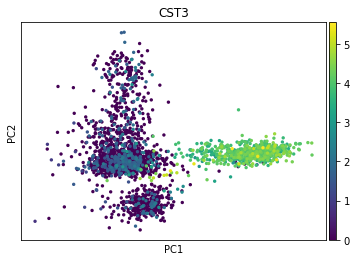

In [109]:
sc.pl.pca(adata, color='CST3')

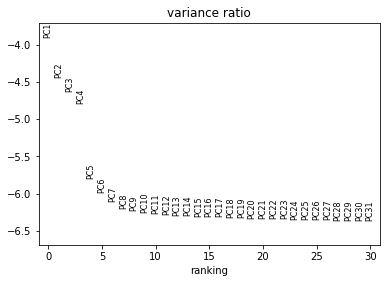

In [110]:
sc.pl.pca_variance_ratio(adata, log=True)

In [111]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [114]:
sc.tl.umap(adata)

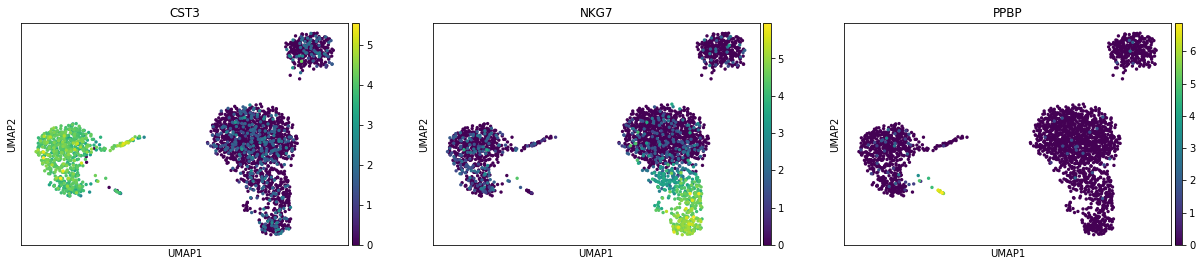

In [115]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

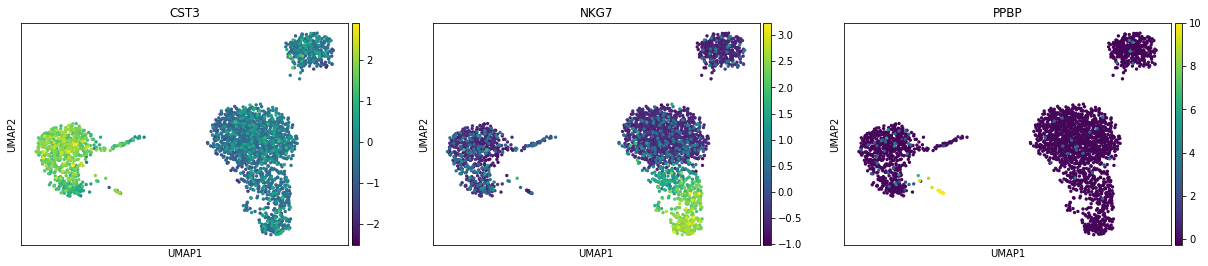

In [116]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [122]:
sc.tl.leiden(adata)

**Note you likely have not installed leiden beforehand and need to do so for this function to work**

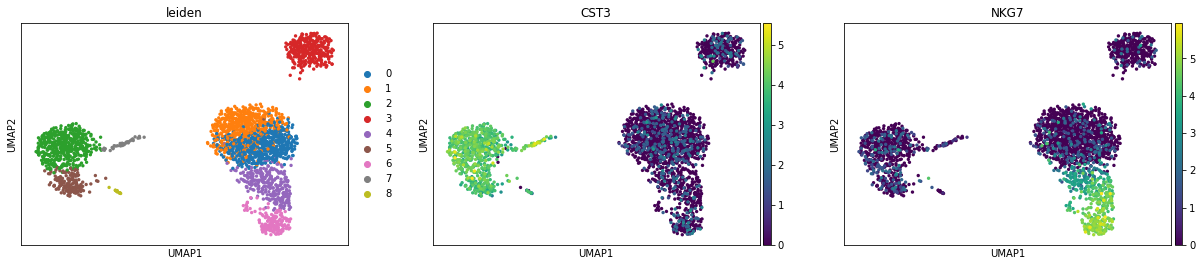

In [123]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

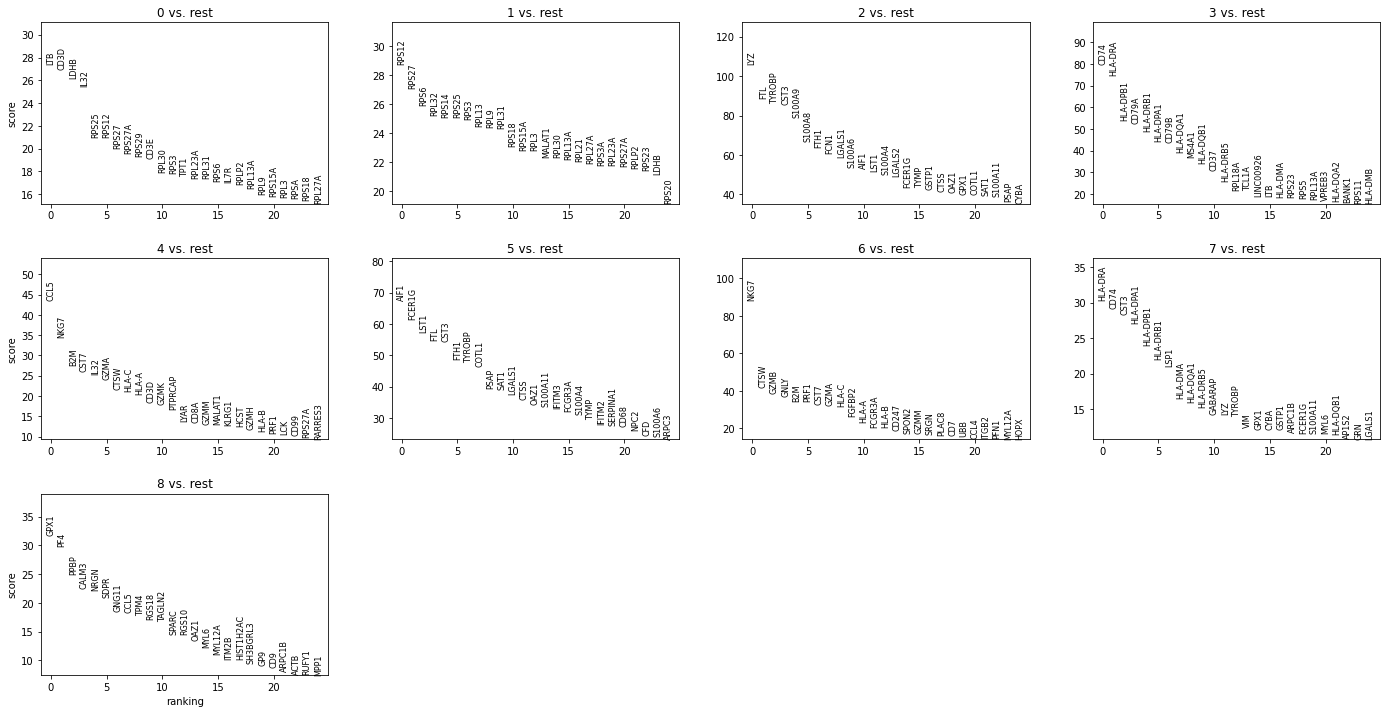

In [124]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


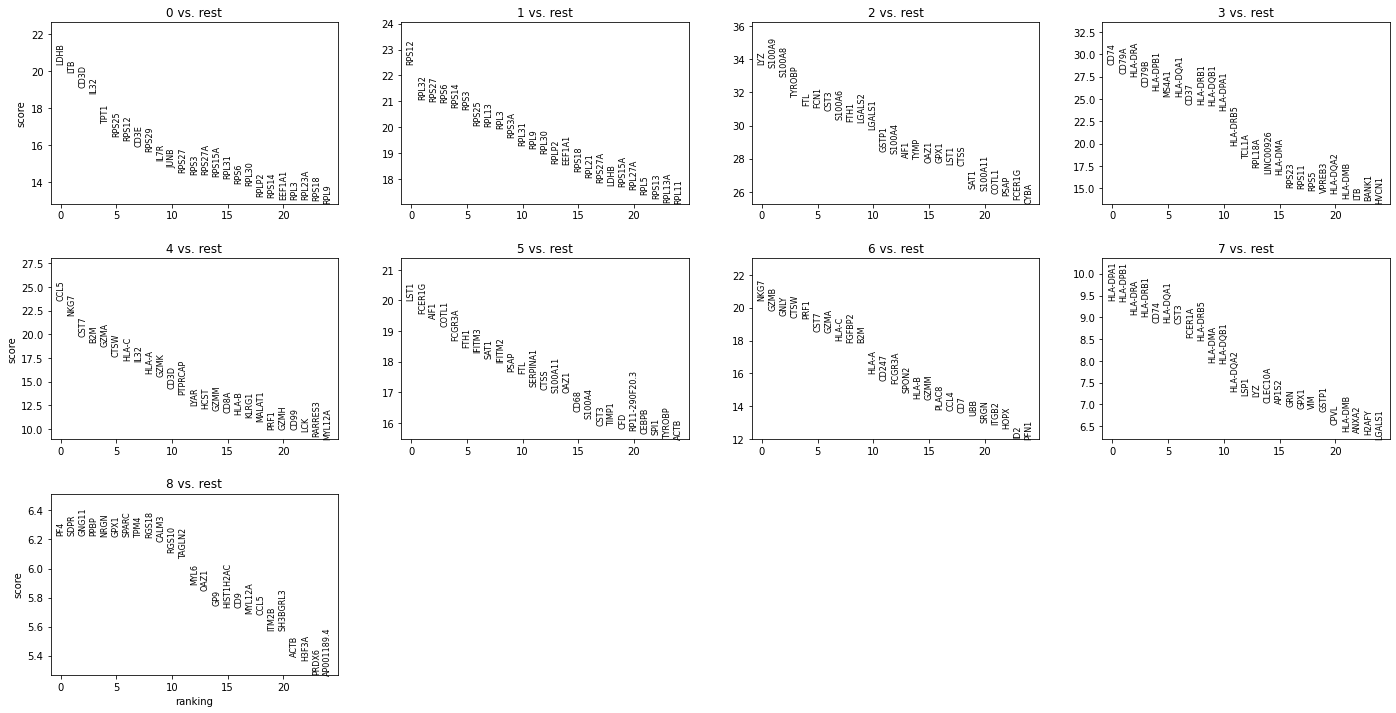

In [125]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/Users/bharris/miniconda3/envs/feyn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


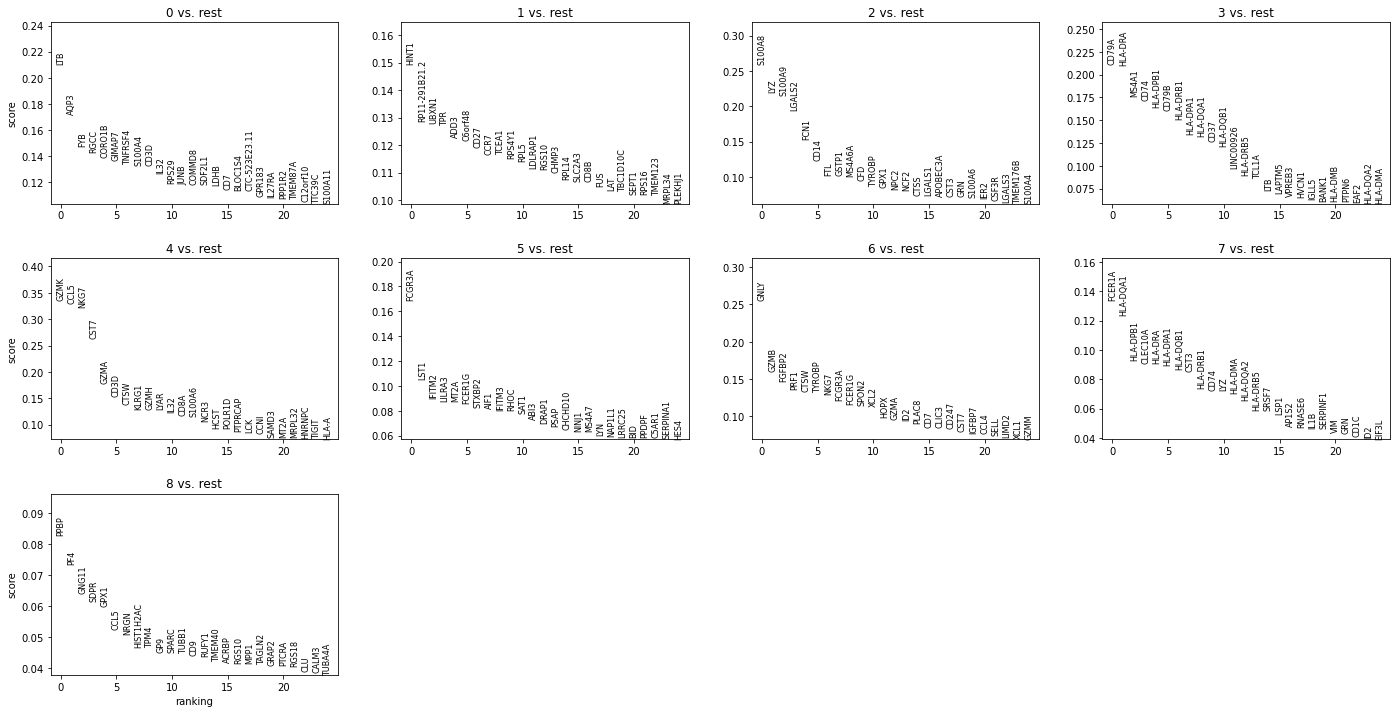

In [126]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)